In [1]:
import torch
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from tqdm import tqdm

/home/joo/vsc/workspaces/my_utils/my_utils/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename = 'crack_test_origin.MP4'
file_path = "/home/joo/Downloads/"+filename # 동영상 파일 경로

vidcap = cv2.VideoCapture(file_path)

if not vidcap.isOpened():
    print("Could not Open : "+file_path)
    exit(0)
else:
    print("Success !")

Success !


In [3]:
#불러온 비디오 파일의 정보 출력
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = vidcap.get(cv2.CAP_PROP_FPS)

print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 2408
width : 3840
height : 2160
fps : 29.97002997002997


In [4]:
cap = cv2.VideoCapture(file_path) # 동영상 캡쳐 객체 생성  ---①
if cap.isOpened():                 # 캡쳐 객체 초기화 확인
    cnt = 1

    #프레임을 저장할 디렉토리를 생성
    try:
        if not os.path.exists(filename[:-4]):
            os.makedirs(filename[:-4])
    except OSError:
        print ('Error: Creating directory. ' +  filename[:-4])

    while True:
        ret, img = cap.read()      # 다음 프레임 읽기      --- ②
        if ret:                     # 프레임 읽기 정상
            cv2.imwrite(filename[:-4]+"/crack_test_"+str(cnt).zfill(4)+".jpg",img) # 화면에 표시  --- ③
            print("crack_test_"+str(cnt).zfill(4)+" success!!")            # 25ms 지연(40fps로 가정)   --- ④
            cnt += 1
        else:                       # 다음 프레임 읽을 수 없슴,
            break                   # 재생 완료

    print(filename[:-4]+"/ check!!!!!!")
else:
    print("can't open video.")      # 캡쳐 객체 초기화 실패

cap.release()                       # 캡쳐 자원 반납

crack_test_0001 success!!
crack_test_0002 success!!
crack_test_0003 success!!
crack_test_0004 success!!
crack_test_0005 success!!
crack_test_0006 success!!
crack_test_0007 success!!
crack_test_0008 success!!
crack_test_0009 success!!
crack_test_0010 success!!
crack_test_0011 success!!
crack_test_0012 success!!
crack_test_0013 success!!
crack_test_0014 success!!
crack_test_0015 success!!
crack_test_0016 success!!
crack_test_0017 success!!
crack_test_0018 success!!
crack_test_0019 success!!
crack_test_0020 success!!
crack_test_0021 success!!
crack_test_0022 success!!
crack_test_0023 success!!
crack_test_0024 success!!
crack_test_0025 success!!
crack_test_0026 success!!
crack_test_0027 success!!
crack_test_0028 success!!
crack_test_0029 success!!
crack_test_0030 success!!
crack_test_0031 success!!
crack_test_0032 success!!
crack_test_0033 success!!
crack_test_0034 success!!
crack_test_0035 success!!
crack_test_0036 success!!
crack_test_0037 success!!
crack_test_0038 success!!
crack_test_0

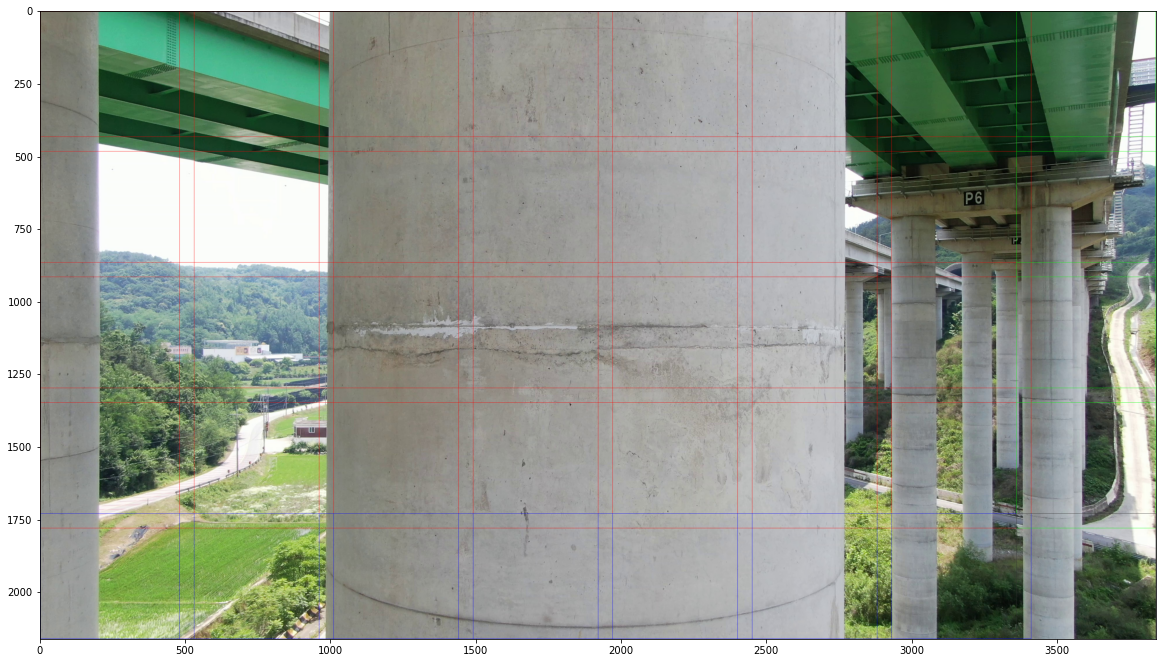

In [9]:
# 이미지 읽기
save_path = "saved_patches_2/" # 계속 바꾸셈

try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print ('Error: Creating directory. ' +  save_path)

finally_path = list(map(lambda x : x[len(filename[:-4])+12:-4],sorted(glob.glob(filename[:-4]+"/*"))))

for k in finally_path: # file_name or finally_path or test_select

    img=cv2.imread(filename[:-4]+"/crack_test_"+k+".jpg") # temp    
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    image_copy = img.copy()
    imgheight=img.shape[0] # 높이 가져오기
    imgwidth=img.shape[1] # 너비 가져오기
    
    # M = 480 # height
    # N = 320 # widht
    M = 432
    N = 480
    x1 = 0
    y1 = 0

    for i, y in enumerate(range(0, imgheight, M)):
        for j, x in enumerate(range(0, imgwidth, N)):
            if (imgheight - y) < M or (imgwidth - x) < N:
                break
                
            y1 = y + M
            x1 = x + N

            # check whether the patch width or height exceeds the image width or height
            if x1 >= imgwidth and y1 >= imgheight:
                x1 = imgwidth - 1
                y1 = imgheight - 1
                tiles = image_copy[y:y+M+50, x:x+N]

                # cv2.imwrite(save_path+k+'_'+str(i)+'_'+str(j).zfill(2)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1, y1+50), (50,50,50), 1) # (50, 50, 50)

            elif y1 >= imgheight: # when patch height exceeds the image height
                y1 = imgheight - 1
                tiles = image_copy[y:y+M, x:x+N+50]

                # cv2.imwrite(save_path+k+'_'+str(i)+'_'+str(j).zfill(2)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1+50, y1), (0,0,255), 1) # (0, 0, 255)

            elif x1 >= imgwidth: # when patch width exceeds the image width
                x1 = imgwidth - 1
                tiles = image_copy[y:y+M+50, x:x+N]

                # cv2.imwrite(save_path+k+'_'+str(i)+'_'+str(j).zfill(2)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1, y1+50), (0,255,0), 1) # (0, 255, 0)
            else:
                tiles = image_copy[y:y+M+50, x:x+N+50]

                # cv2.imwrite(save_path+k+'_'+str(i)+'_'+str(j).zfill(2)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1+50, y1+50), (255,0,0), 1) # (255, 0, 0)
    
    # 이미지 표시하기
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()
    plt.close()
    break

In [13]:
! python3 ../../

/home/joo/vsc/workspaces/my_utils/src/data


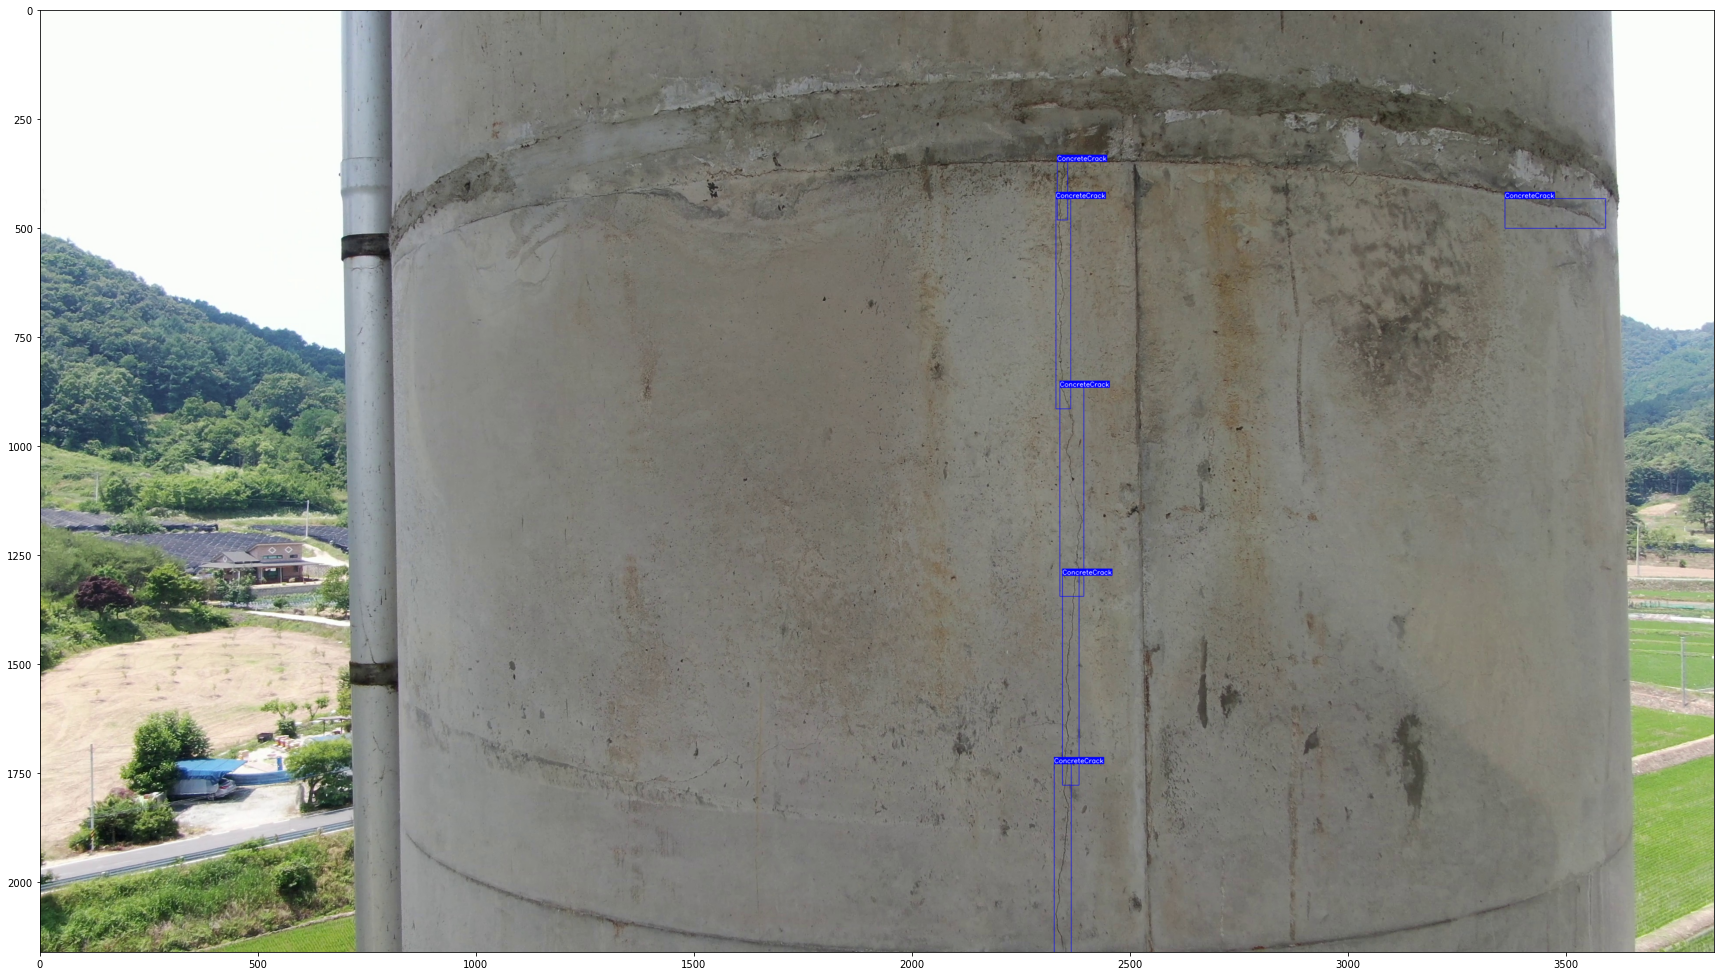

In [35]:
class_list = ["ConcreteCrack"]  #          <---- 조절
M = 432                         # height   <---- 조절
n = 480                         # width    <---- 조절
detect_number = "exp2"          #          <---- 조절

for k in range(int(finally_path[0]),int(finally_path[-1])):
    if k != 1635 : continue
    k = str(k).zfill(4)  
    
    result_img = cv2.imread(filename[:-4]+"/crack_test_"+k+".jpg") # 기본
    result_img =cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    result_label = list(map(lambda x : x[23:], glob.glob(os.path.expanduser("/home/joo/vsc/workspaces/final/yolov5/runs/detect/"+detect_number+"/labels/"+k+"_*")))) # yolov5 test 한 경로

    if len(result_label) != 0:
        result_label.sort()

        for i in result_label: 
            i = i[39:] # i == /home/joo/vsc/workspaces/final/yolov5/runs/detect/exp2/labels/1403_01_02.jpg
            m_size = int(i.split("_")[1]) * M
            n_size = int(i.split("_")[2][:-4]) * n

            with open("/home/joo/vsc/workspaces/final/yolov5/runs/detect/"+detect_number+"/labels/"+i, "r") as f:
                for ff in f:
                    data = ff.strip().split(" ")
                    p1, p2 = (int(data[1]) + n_size, int(data[2]) + m_size), (int(data[3]) + n_size, int(data[4]) + m_size)

                    # label = class_list[int(data[0])]+" "+data[5][7:-4] # label + conf
                    label = class_list[int(data[0])] # label

                    w, h = cv2.getTextSize(label, 0, fontScale=0.5, thickness=1)[0]  # text width, height // thickness = 2 fontscale=1
                    outside = p1[1] - h >= 3
                    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3

                    result_img = cv2.rectangle(result_img, (int(data[1]) + n_size, int(data[2]) + m_size),     (int(data[3]) + n_size, int(data[4]) + m_size), (0,0,255), 1, lineType=cv2.LINE_AA)
                    result_img = cv2.rectangle(result_img, p1, p2, (0,0,255), -1, cv2.LINE_AA)  # filled
                    result_img = cv2.putText(result_img,label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),0,0.5,(255,255,255),thickness=1,lineType=cv2.LINE_AA) # 0,1,(255,255,255),thickness=2

    plt.figure(figsize=(30,30))
    plt.imshow(result_img)
    plt.show()
    plt.close()

    # cv2.imwrite("runs/detect/"+detect_number+"/"+k+".tiff",result_img) # k or select_num
    break